# Preliminaries and Dataframe Construction

In [7]:
# Import modules
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

#Formatting
plt.rcParams['font.family'] = 'Times New Roman'  # Set plt shows font to Times New Roman
plt.rcParams['axes.grid'] = True  # Ensure line graphs display on graphs
sns.set_palette(sns.color_palette('Accent')) #set color palette to a nice seaborn style https://seaborn.pydata.org/tutorial/color_palettes.html

In [8]:
stats_overall_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='Overall')
stats_race_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='Race')
stats_age_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='Age Group')
stats_COVID_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='COVID Status')

## Allocation Analysis

In [22]:
lott_A_rate = stats_race_50.where(stats_race_50['Protocol']=='Lottery').groupby(['Protocol', 'Race']).mean().reset_index()
lott_A_rate_dict=dict(zip(lott_A_rate['Race'], lott_A_rate['A_rate']))

stats_race_50=(stats_race_50
                .assign(A_rate_lott = lambda df_: df_['Race'].map(lott_A_rate_dict))
                .assign(A_rate_gap = lambda df_ : df_['A_rate']-df_['A_rate_lott'])
        )

<function matplotlib.pyplot.show(close=None, block=None)>

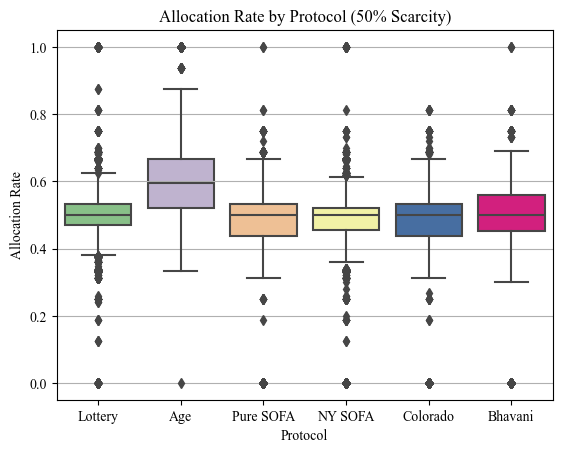

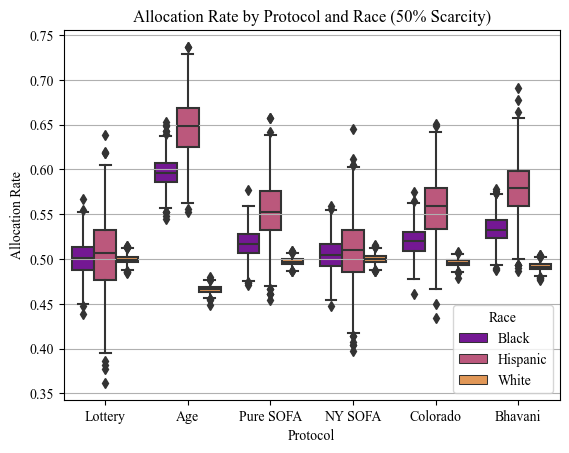

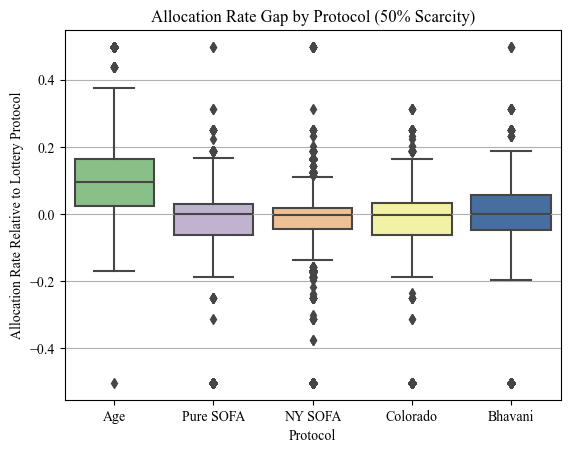

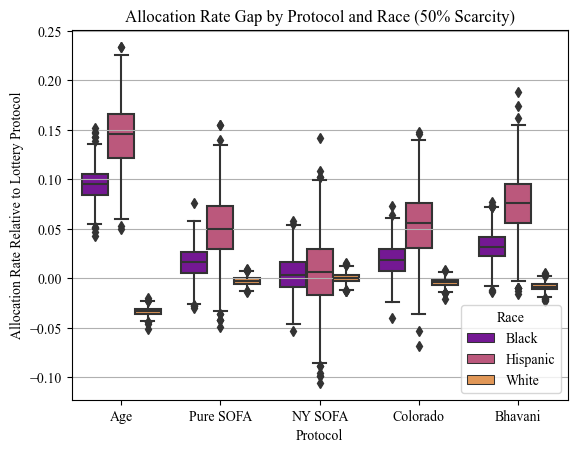

<Figure size 640x480 with 0 Axes>

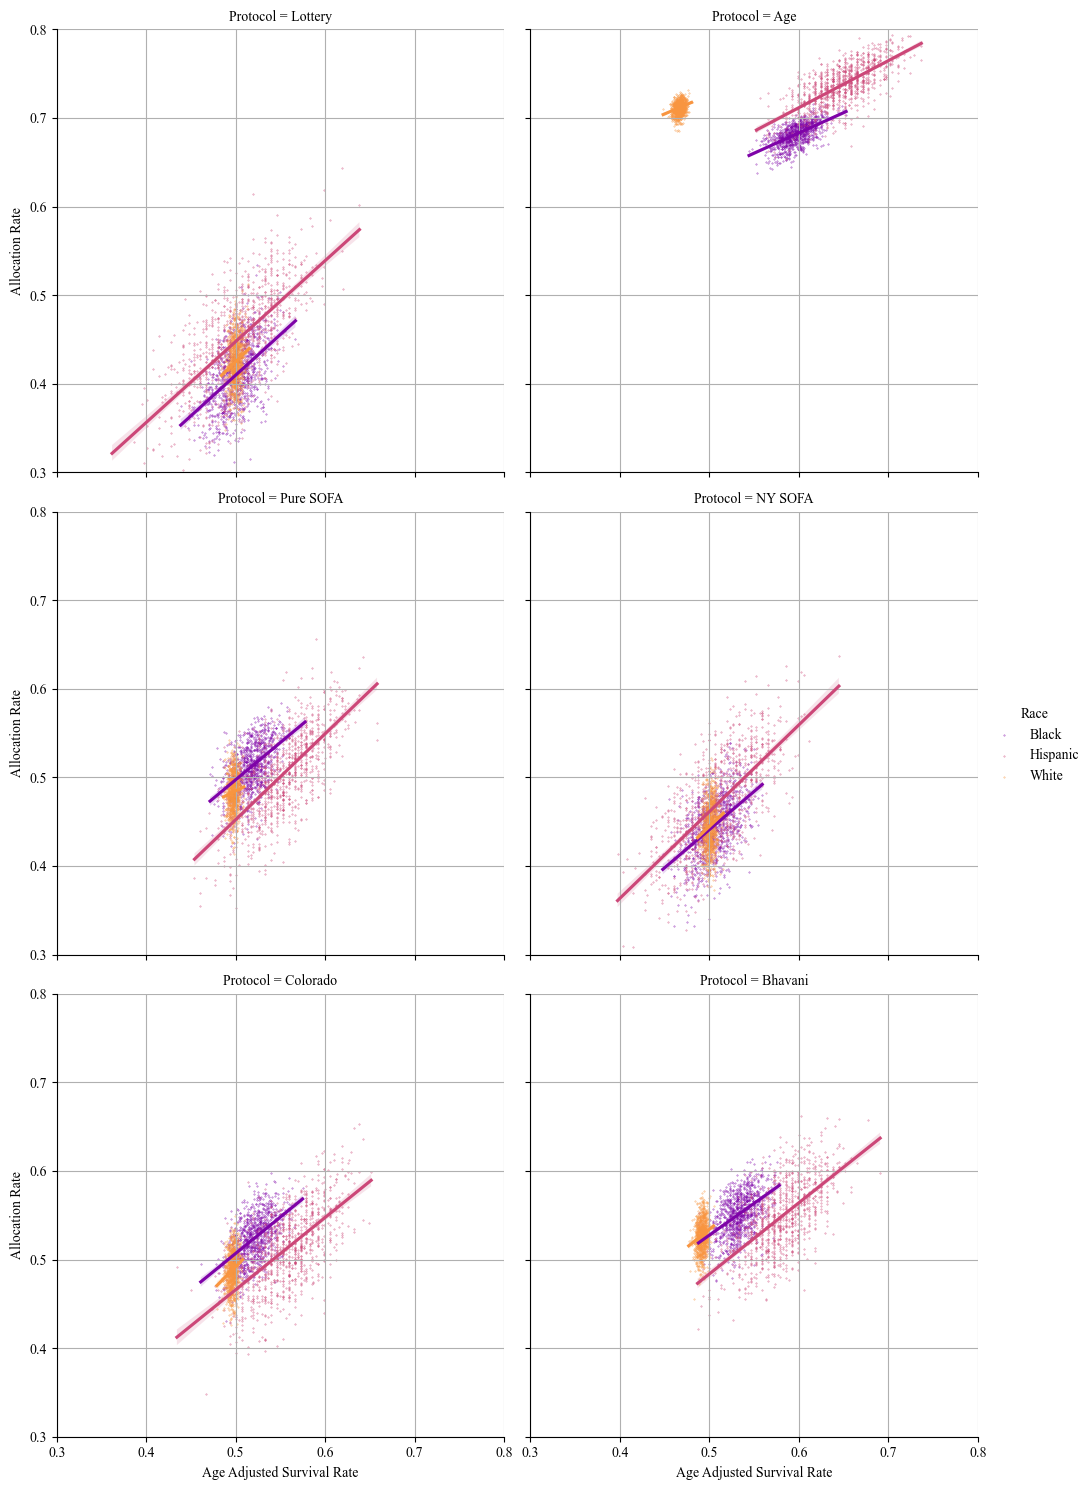

In [25]:
race_order = ['Black','Hispanic', 'White']
protocol_order = ['Lottery', 'Age', 'Pure SOFA', 'NY SOFA', 'Colorado', 'Bhavani']
protocol_order_short = ['Age', 'Pure SOFA', 'NY SOFA', 'Colorado', 'Bhavani']

fig1 = plt.figure()
g1 = sns.boxplot(y='A_rate',
            x='Protocol',
            order = protocol_order,
            #hue = 'Race',
            #hue_order = race_order,
            data=stats_race_50,
            #palette = 'plasma',
)
g1 = (g1.set (title='Allocation Rate by Protocol (50% Scarcity)', xlabel = "Protocol", ylabel = "Allocation Rate"
)
)
plt.show


fig1a = plt.figure()
g1a = sns.boxplot(y='A_rate',
            x='Protocol',
            order = protocol_order,
            hue = 'Race',
            hue_order = race_order,
            data=stats_race_50,
            palette = 'plasma',
)
g1a = (g1a.set (title='Allocation Rate by Protocol and Race (50% Scarcity)', xlabel = "Protocol", ylabel = "Allocation Rate"
)
)
plt.show

fig1b = plt.figure()
g1b = sns.boxplot(y='A_rate_gap',
            x='Protocol',
            order = protocol_order_short,
            #hue = 'Race',
            #hue_order = race_order,
            data=stats_race_50,
            #palette = 'plasma',
)
g1b = (g1b.set (title='Allocation Rate Gap by Protocol (50% Scarcity)', xlabel = "Protocol", ylabel = "Allocation Rate Relative to Lottery Protocol"
)
)
plt.show

fig1c = plt.figure()
g1c = sns.boxplot(y='A_rate_gap',
            x='Protocol',
            order = protocol_order_short,
            hue = 'Race',
            hue_order = race_order,
            data=stats_race_50,
            palette = 'plasma',
)
g1c = (g1c.set (title='Allocation Rate Gap by Protocol and Race (50% Scarcity)', xlabel = "Protocol", ylabel = "Allocation Rate Relative to Lottery Protocol"
)
)
plt.show

##Allocation Rate by Age-Adjusted Survival

fig2 = plt.figure()
g2 = sns.lmplot(y='Age_Adj_S_rate',
            x='A_rate',
            hue = 'Race',
            col = 'Protocol',
            col_wrap=2,
            col_order = protocol_order,
            hue_order= race_order,
            data=stats_race_50,
            palette = 'plasma',
            scatter_kws={'s':0.1}
)
g2 = (g2.set (xlabel = "Age Adjusted Survival Rate", ylabel = "Allocation Rate", ylim=(0.3, 0.8), xlim=(0.3,0.8))
)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

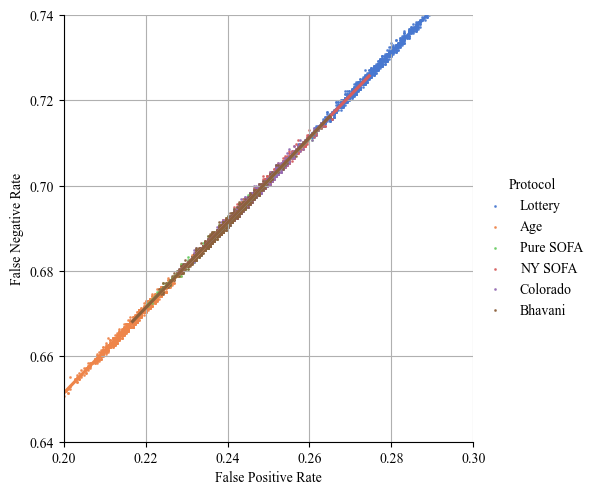

<Figure size 640x480 with 0 Axes>

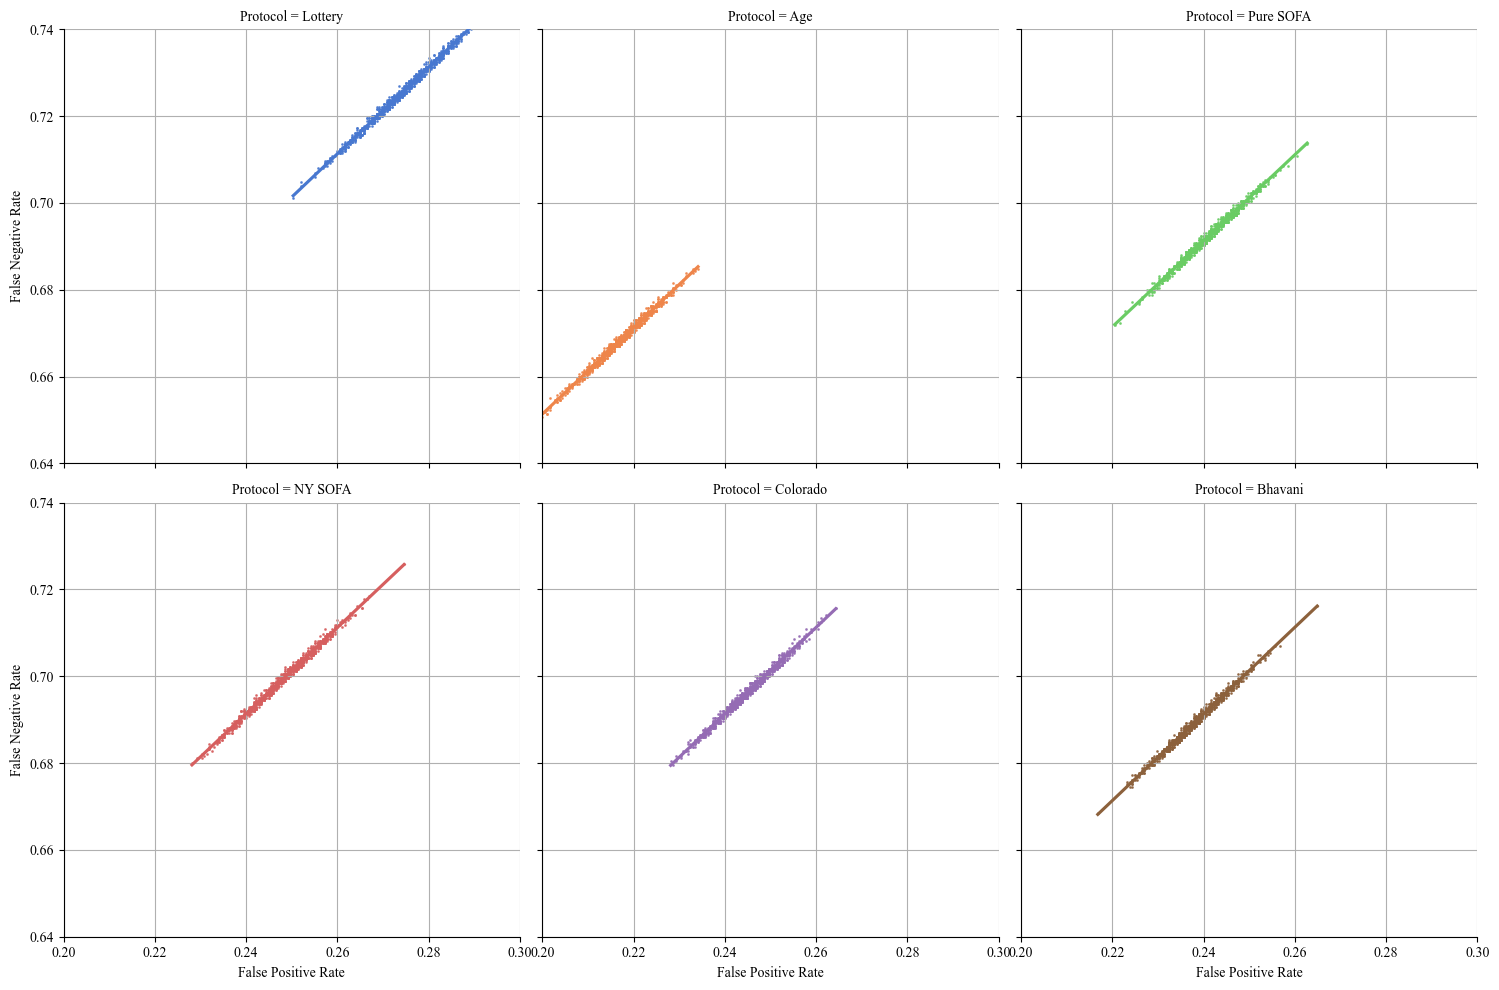

<Figure size 640x480 with 0 Axes>

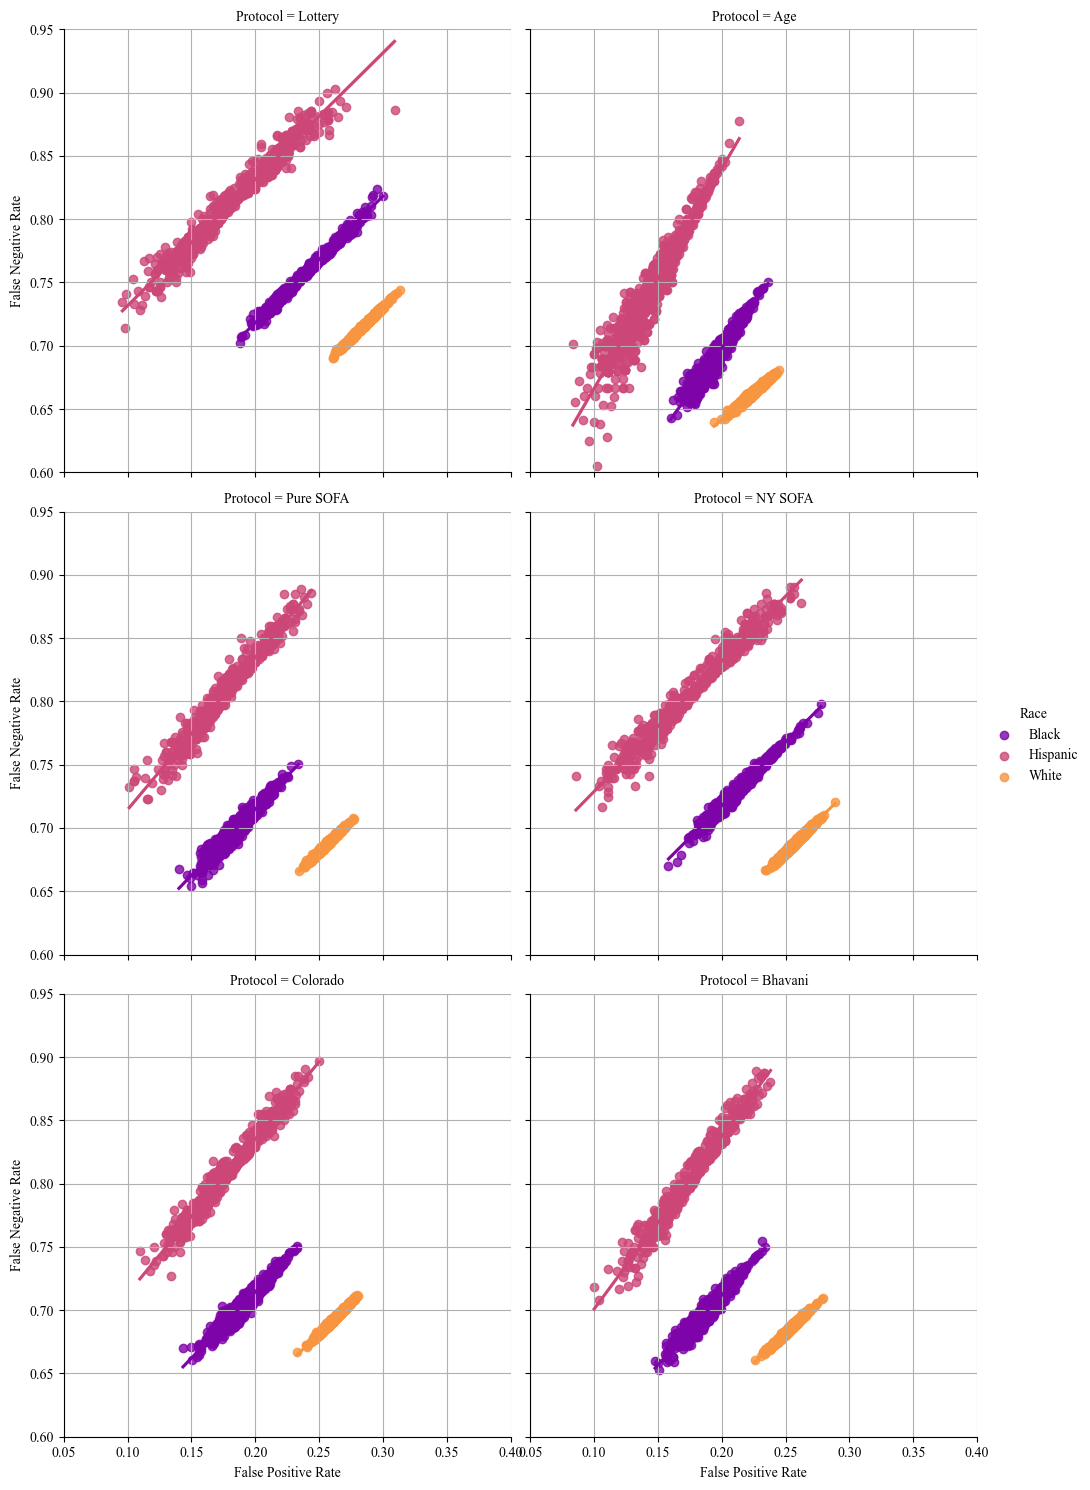

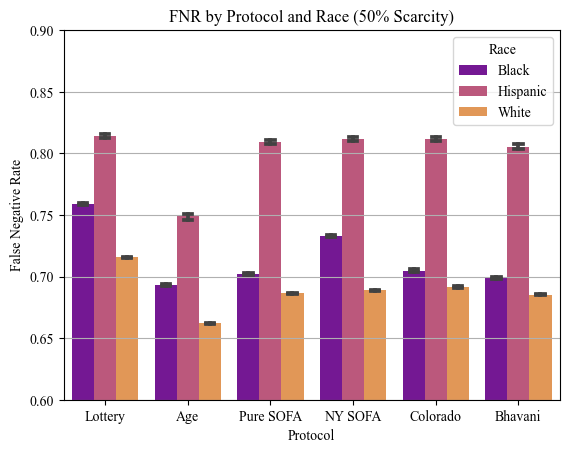

In [31]:
##FPR FNR Analysis
race_order = ['Black','Hispanic', 'White']
protocol_order = ['Lottery', 'Age', 'Pure SOFA', 'NY SOFA', 'Colorado', 'Bhavani']

stats_race_50 = stats_race_50.assign(TP_rate = 1-stats_race_50['FN_rate'])
stats_overall_50=stats_overall_50.assign(TP_rate = 1-stats_overall_50['FN_rate'])

fig00 = plt.figure()
g00 = sns.lmplot(y='FN_rate',
            x='FP_rate',
            hue='Protocol',
            hue_order=protocol_order,
            data=stats_overall_50,
            palette = 'muted',
            scatter_kws={'s':1}
)
g00 = (g00.set (xlabel = "False Positive Rate", ylabel = "False Negative Rate", ylim=(0.64,0.74), xlim = (0.2,0.3))
)
plt.show

fig0 = plt.figure()
g0 = sns.lmplot(y='FN_rate',
            x='FP_rate',
            col = 'Protocol',
            col_order = protocol_order,
            col_wrap=3,
            hue='Protocol',
            hue_order=protocol_order,
            data=stats_overall_50,
            palette = 'muted',
            scatter_kws={'s':1}
)
g0 = (g0.set (xlabel = "False Positive Rate", ylabel = "False Negative Rate", ylim=(0.64,0.74), xlim = (0.2,0.3))
)
plt.show

fig1 = plt.figure()
g1 = sns.lmplot(y='FN_rate',
            x='FP_rate',
            hue = 'Race',
            col = 'Protocol',
            col_wrap=2,
            col_order = protocol_order,
            hue_order = race_order,
            data=stats_race_50,
            palette = 'plasma',
)
g1 = (g1.set (xlabel = "False Positive Rate", ylabel = "False Negative Rate", ylim=(0.6,0.95), xlim = (0.05,0.4))
)
plt.show

fig2 = plt.figure()
g2 = sns.barplot(y='FN_rate',
            x='Protocol',
            order = protocol_order,
            hue = 'Race',
            hue_order = race_order,
            data=stats_race_50,
            palette = 'plasma',
            capsize = 0.1,
)
g2 = (g2.set (title='FNR by Protocol and Race (50% Scarcity)', xlabel = "Protocol", ylabel = "False Negative Rate", ylim=(0.6,0.9)
)
)
plt.show

## Survival Analysis

In [10]:
##Get Age_Adj_S_rates for
lott_Age_Adj_S_rate = stats_race_50.where(stats_race_50['Protocol']=='Lottery').groupby(['Protocol', 'Race']).mean().reset_index()
lott_Age_Adj_S_rate_dict=dict(zip(lott_Age_Adj_S_rate['Race'], lott_Age_Adj_S_rate['Age_Adj_S_rate']))

stats_race_50=(stats_race_50
                .assign(Age_Adj_S_rate_lott = lambda df_: df_['Race'].map(lott_Age_Adj_S_rate_dict))
                .assign(Age_Adj_S_rate_gap = lambda df_ : df_['Age_Adj_S_rate']-df_['Age_Adj_S_rate_lott'])
        )
                  

<function matplotlib.pyplot.show(close=None, block=None)>

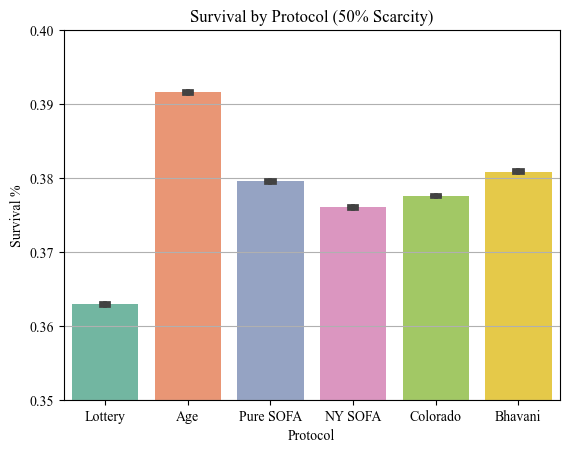

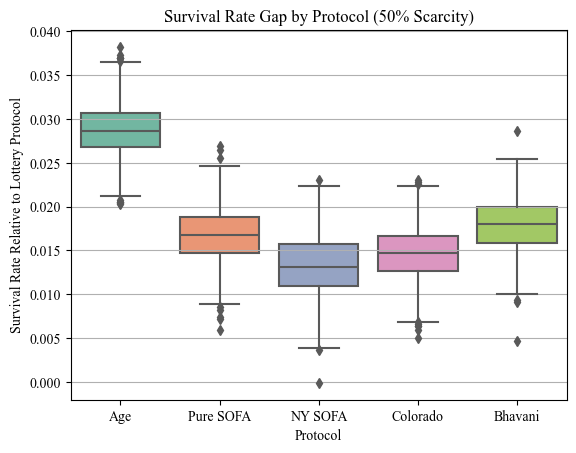

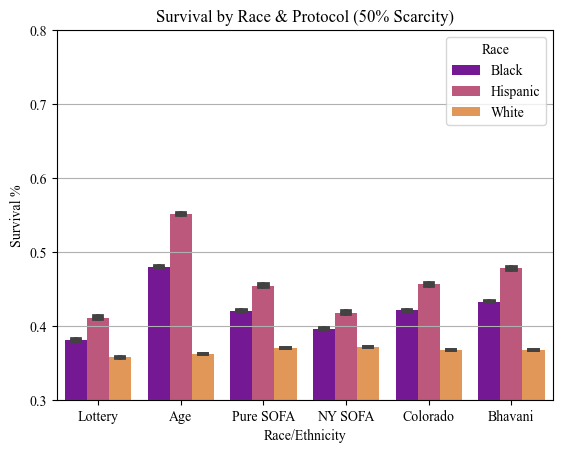

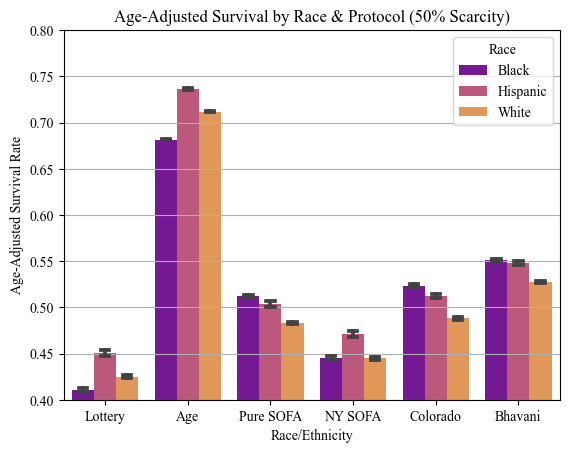

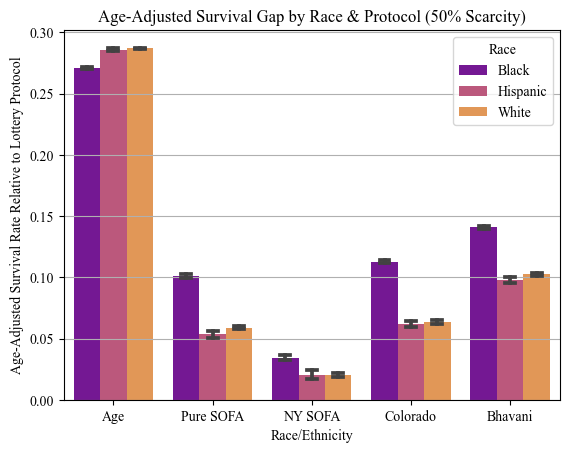

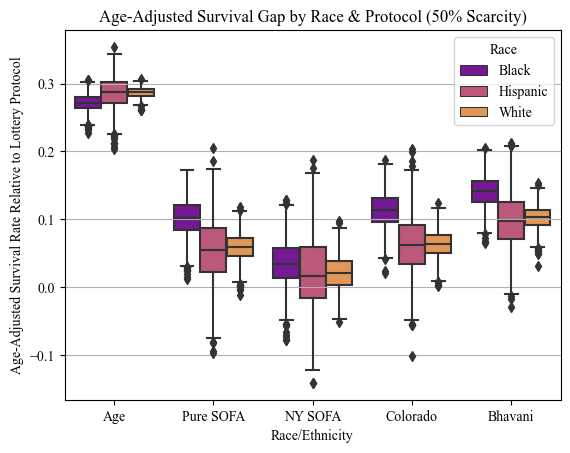

In [18]:
race_order = ['Black','Hispanic', 'White']
protocol_order = ['Lottery', 'Age', 'Pure SOFA', 'NY SOFA', 'Colorado', 'Bhavani']

# df.set_index(KEY).to_dict()[VALUE]


fig1 = plt.figure()
g1 = sns.barplot(y='S_rate',
            x='Protocol',
            order = protocol_order,
            data=stats_overall_50,
            palette = 'Set2',
            capsize = 0.1,
)
g1 = (g1.set (title='Survival by Protocol (50% Scarcity)', xlabel = "Protocol", ylabel = "Survival %", ylim=(0.35,0.4)
)
)
plt.show

fig1a = plt.figure()
g1a = sns.boxplot(y='LS_rate',
            x='Protocol',
            order = protocol_order_short,
            data=stats_overall_50,
            palette = 'Set2',
            #capsize = 0.1,
)
g1a = (g1a.set (title='Survival Rate Gap by Protocol (50% Scarcity)', xlabel = "Protocol", ylabel = "Survival Rate Relative to Lottery Protocol", #ylim=(0.35,0.4)
)
)
plt.show

fig2a = plt.figure()
g2a = sns.barplot(y='S_rate',
            x='Protocol',
            order = protocol_order,
            data=stats_race_50,
            hue = 'Race',
            hue_order= race_order,
            palette = 'plasma',
            capsize = 0.1
)
g2a = (g2a.set (title='Survival by Race & Protocol (50% Scarcity)', xlabel = "Race/Ethnicity", ylabel = "Survival %", ylim=(0.3,0.8)
)
)
plt.show

fig2b = plt.figure()
g2b = sns.barplot(y='Age_Adj_S_rate',
            x='Protocol',
            order = protocol_order,
            data=stats_race_50,
            hue = 'Race',
            hue_order= race_order,
            palette = 'plasma',
            capsize = 0.1
)
g2b = (g2b.set (title='Age-Adjusted Survival by Race & Protocol (50% Scarcity)', xlabel = "Race/Ethnicity", ylabel = "Age-Adjusted Survival Rate", ylim=(0.4,0.8)
)
)
plt.show

fig3b = plt.figure()
g3b = sns.barplot(y='Age_Adj_S_rate_gap',
            x='Protocol',
            order = protocol_order_short,
            data=stats_race_50,
            hue = 'Race',
            hue_order= race_order,
            palette = 'plasma',
            capsize = 0.1
)
g3b = (g3b.set (title='Age-Adjusted Survival Gap by Race & Protocol (50% Scarcity)', xlabel = "Race/Ethnicity", ylabel = "Age-Adjusted Survival Rate Relative to Lottery Protocol"
)
)
plt.show

fig3c = plt.figure()
g3c = sns.boxplot(y='Age_Adj_S_rate_gap',
            x='Protocol',
            order = protocol_order_short,
            data=stats_race_50,
            hue = 'Race',
            hue_order= race_order,
            palette = 'plasma',
)
g3c = (g3c.set (title='Age-Adjusted Survival Gap by Race & Protocol (50% Scarcity)', xlabel = "Race/Ethnicity", ylabel = "Age-Adjusted Survival Rate Relative to Lottery Protocol"
)
)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

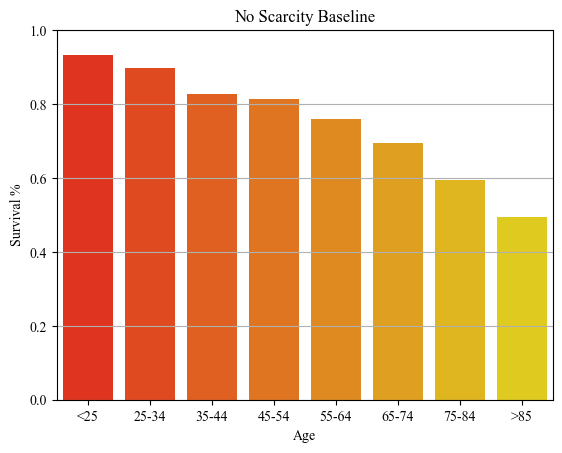

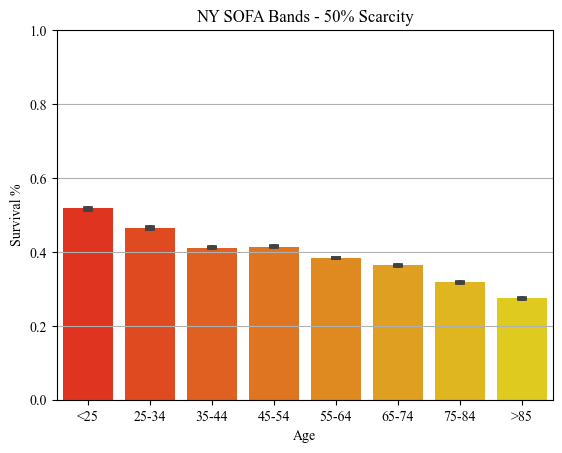

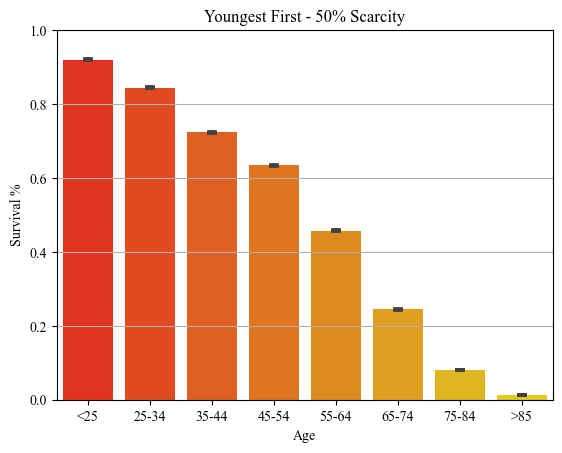

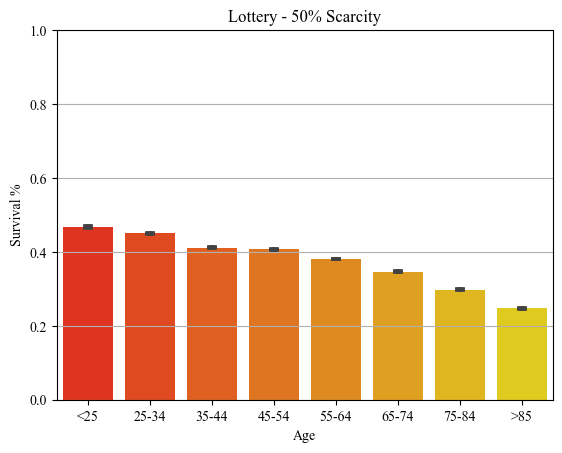

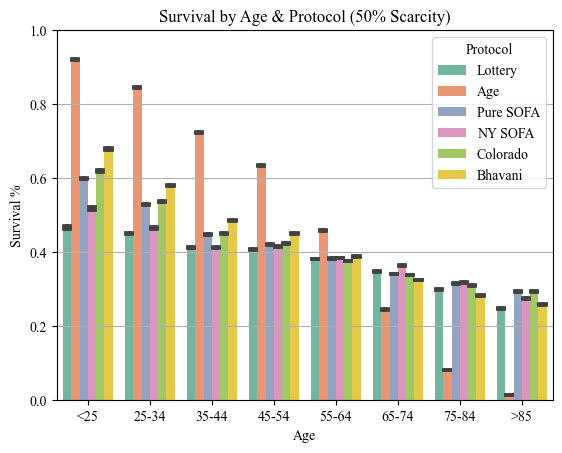

In [4]:
age_order = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>85']

fig0A = plt.figure()
g0A = sns.barplot(y='S_rate',
            x='Age_Group',
            order = age_order,
            data=stats_age_50.where(stats_age_50.Protocol == 'Baseline'),
            palette = 'autumn',
            capsize = 0.1,
)
g0A = (g0A.set (title='No Scarcity Baseline', xlabel = "Age", ylabel = "Survival %", ylim=(0,1.0))
)
plt.show

fig1A = plt.figure()
g1A = sns.barplot(y='S_rate',
            x='Age_Group',
            order = age_order,
            data=stats_age_50.where(stats_age_50.Protocol == 'NY SOFA'),
            palette = 'autumn',
            capsize = 0.1,
)
g1A = (g1A.set (title='NY SOFA Bands - 50% Scarcity', xlabel = "Age", ylabel = "Survival %", ylim=(0,1.0))
)
plt.show

fig2A = plt.figure()
g2A = sns.barplot(y='S_rate',
            x='Age_Group',
            order = age_order,
            data=stats_age_50.where(stats_age_50.Protocol == 'Age'),
            palette = 'autumn',
            capsize = 0.1,
)
g2A = (g2A.set (title='Youngest First - 50% Scarcity', xlabel = "Age", ylabel = "Survival %", ylim=(0,1.0))
)
plt.show

fig3A = plt.figure()
g3A = sns.barplot(y='S_rate',
            x='Age_Group',
            data=stats_age_50.where(stats_age_50.Protocol == 'Lottery'),
            order = age_order,
            palette = 'autumn',
            capsize = 0.1,
)
g3A = (g3A.set (title='Lottery - 50% Scarcity', xlabel = "Age", ylabel = "Survival %", ylim=(0,1.0))
)
plt.show

fig4A = plt.figure()
g4A = sns.barplot(y='S_rate',
            x='Age_Group',
            hue='Protocol',
            data=stats_age_50,
            order = age_order,
            hue_order = protocol_order,
            palette = 'Set2',
            capsize = 0.1,
)
g4A = (g4A.set (title='Survival by Age & Protocol (50% Scarcity)', xlabel = "Age", ylabel = "Survival %", ylim=(0,1.0))
)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

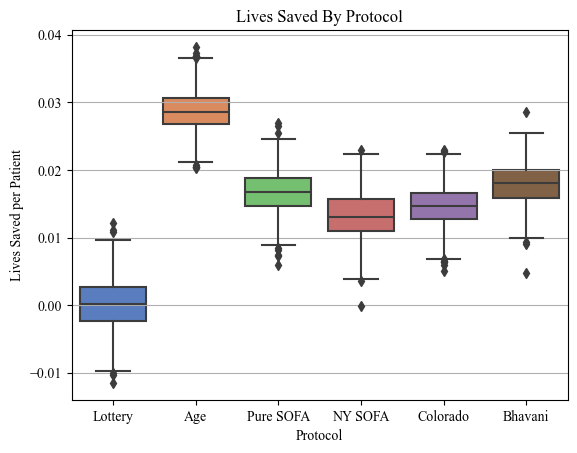

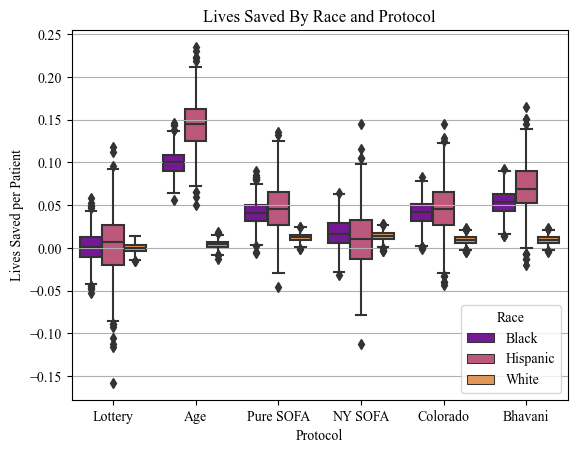

In [9]:
race_order = ['Black','Hispanic', 'White']
protocol_order = ['Lottery', 'Age', 'Pure SOFA', 'NY SOFA', 'Colorado', 'Bhavani']
protocol_order_short = ['Age', 'Pure SOFA', 'NY SOFA', 'Colorado', 'Bhavani']

fig4A = plt.figure()
g4A = sns.boxplot(y='LS_rate',
            x='Protocol',
            data=stats_overall_50,
            order = protocol_order,
            palette = 'muted',
            #capsize = 0.1,
)
g4A = (g4A.set (title='Lives Saved By Protocol', xlabel = "Protocol", ylabel = "Lives Saved per Patient")
)
plt.show

fig4A = plt.figure()
g4A = sns.boxplot(y='LS_rate',
            x='Protocol',
            data=stats_race_50,
            hue='Race',
            order = protocol_order,
            hue_order = race_order,
            palette = 'plasma',
            #capsize = 0.1,
)
g4A = (g4A.set (title='Lives Saved By Race and Protocol', xlabel = "Protocol", ylabel = "Lives Saved per Patient")
)
plt.show

### Life Expectancy Analsyis

In [10]:
#stats_YLL_overall_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='YLL_Overall')
#stats_YLL_race_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='YLL_Race')
#stats_LE_age_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='Age Group')
#stats_LE_COVID_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='COVID Status')

stats_Cho_overall_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='Cho_Overall')
stats_Cho_race_50 = pd.read_excel('MC-50-results-stats.xlsx', sheet_name='Cho_Race')

<function matplotlib.pyplot.show(close=None, block=None)>

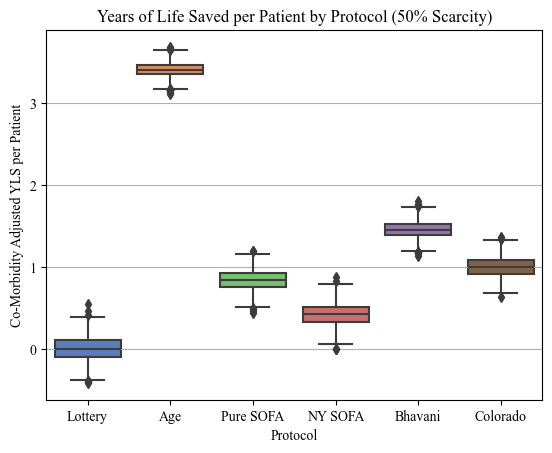

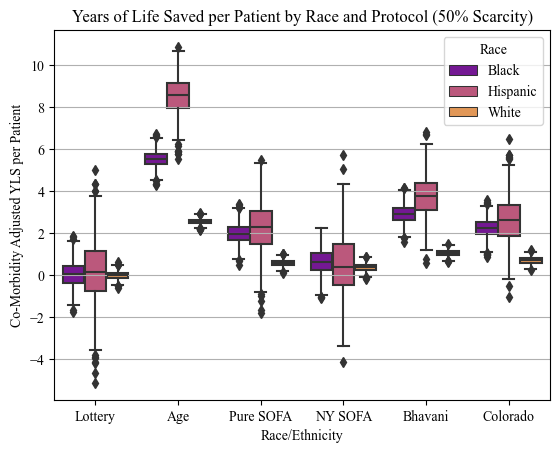

In [11]:
race_order = ['Black','Hispanic', 'White']
protocol_order = ['Lottery', 'Age', 'Pure SOFA', 'NY SOFA', 'Bhavani', 'Colorado']
protocol_order_short = ['Age', 'Pure SOFA', 'NY SOFA', 'Colorado', 'Bhavani']

fig1 = plt.figure()
g1 = sns.boxplot(y='YLS_Cho_rate',
            x='Protocol',
            order = protocol_order,
            data=stats_Cho_overall_50,
            palette = 'muted',
            #capsize = 0.1,
)
g1 = (g1.set (title='Years of Life Saved per Patient by Protocol (50% Scarcity)', xlabel = "Protocol", ylabel = "Co-Morbidity Adjusted YLS per Patient"
)
)
plt.show

fig2a = plt.figure()
g2a = sns.boxplot(y='YLS_Cho_rate',
            x='Protocol',
            order = protocol_order,
            data=stats_Cho_race_50,
            hue = 'Race',
            hue_order= race_order,
            palette = 'plasma',
            #capsize = 0.1
)
g2a = (g2a.set (title='Years of Life Saved per Patient by Race and Protocol (50% Scarcity)', xlabel = "Race/Ethnicity", ylabel = "Co-Morbidity Adjusted YLS per Patient", #ylim=(0.3,0.6)
)
)
plt.show



## Lives Saved Versus Life Years Saved

In [78]:
LS_LYS_overall_50 = stats_overall_50.merge(stats_Cho_overall_50, on= ['Run', 'Protocol'])
LS_LYS_race_50 = stats_race_50.merge(stats_Cho_race_50, on= ['Run', 'Protocol', 'Race'])

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

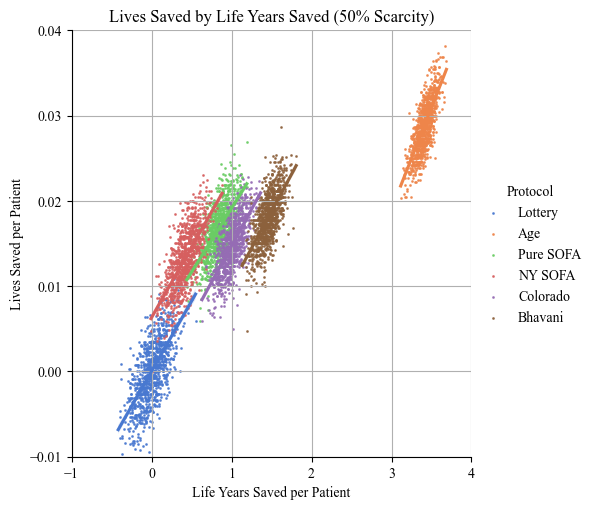

<Figure size 640x480 with 0 Axes>

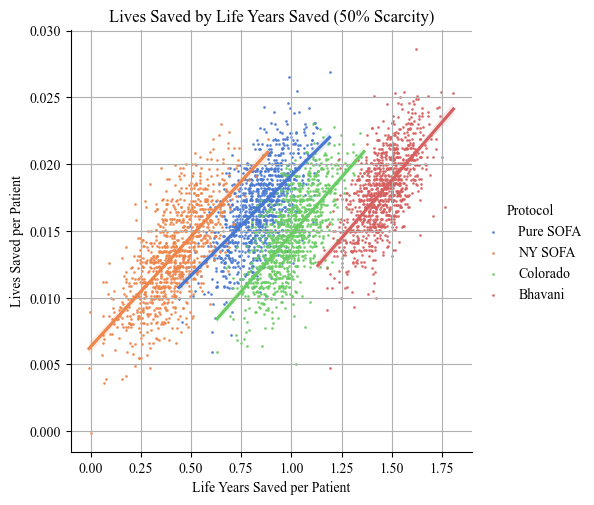

In [79]:
##LS vs LYS
race_order = ['Black','Hispanic', 'White']
protocol_order = ['Lottery', 'Age', 'Pure SOFA', 'NY SOFA', 'Colorado', 'Bhavani']
protocol_order_zoom = ['Pure SOFA', 'NY SOFA', 'Colorado', 'Bhavani']

fig1 = plt.figure()
g1 = sns.lmplot(y='LS_rate',
            x='YLS_Cho_rate',
            hue = 'Protocol',
            #col = 'Protocol',
            #col_wrap=2,
            #col_order = protocol_order,
            hue_order=protocol_order,
            data=LS_LYS_overall_50,
            palette = 'muted',
            scatter_kws={"s": 1}
)
g1 = (g1.set (title='Lives Saved by Life Years Saved (50% Scarcity)', xlabel = "Life Years Saved per Patient", ylabel = "Lives Saved per Patient", ylim=(-0.01, 0.04), xlim=(-1, 4))
)
plt.show

fig2 = plt.figure()
g2 = sns.lmplot(y='LS_rate',
            x='YLS_Cho_rate',
            hue = 'Protocol',
            #col = 'Protocol',
            #col_wrap=2,
            #col_order = protocol_order,
            hue_order=protocol_order_zoom,
            data=LS_LYS_overall_50,
            palette = 'muted',
            scatter_kws={"s": 1}
)
g2 = (g2.set (title='Lives Saved by Life Years Saved (50% Scarcity)', xlabel = "Life Years Saved per Patient", ylabel = "Lives Saved per Patient")
)
plt.show